Завдання до 2 лабораторної роботи:
Для поданої таблиці, що містить 56 спострержень з 8 вхідними факторами виконати кластеризацію запропонованими методами, вызуалізувати результати. Попередньо визначитись з кількістю класетрів для методів, які цього потребують:

Непарні номери варіантів:
1. Виконати кластеризацію методом Уорда
2. Виконати нечітку кластеризацію
3. Виконати кластеризацію методом Лямбда-Краб
4. Виконати кластеризацію методом SOM
5. Виконати кластеризацію методом Expectation-Maximization

Для датасету з країнами: Для кожного року виконати кластеризацію методом  К-середніх, прокоментувати - інтерпретувати результати та порівняти результати за різними роками.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_excel("data.xlsx")  # <- параметр thousands=","
print(data.dtypes)

data['X3'] = data['X3'].astype(str)
data['X7'] = data['X7'].astype(str)

data['X3'] = data['X3'].str.replace(',', '.', regex=False)
data['X7'] = data['X7'].str.replace(',', '.', regex=False)

data = data.apply(pd.to_numeric, errors='coerce')
print("\n",data.dtypes)

№       int64
X1      int64
X2      int64
X3     object
X4      int64
X5      int64
X6      int64
X7     object
X8      int64
dtype: object

 №        int64
X1       int64
X2       int64
X3     float64
X4       int64
X5       int64
X6       int64
X7     float64
X8       int64
dtype: object


In [5]:
data

,№,X1,X2,X3,X4,X5,X6,X7,X8
0,1,6,150,1.8,24,30,120,3.4,15
1,2,7,150,1.8,24,30,120,9.7,5
2,3,6,170,1.8,24,30,120,7.4,23
3,4,7,170,1.8,24,30,120,10.6,8
4,5,6,150,2.4,24,30,120,6.5,20
5,6,7,150,2.4,24,30,120,7.9,9
6,7,6,170,2.4,24,30,120,10.3,13
7,8,7,170,2.4,24,30,120,9.5,5
8,9,6,150,1.8,36,30,120,14.3,23
9,10,7,150,1.8,36,30,120,10.5,1


In [15]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [16]:
def determine_optimal_clusters(data, max_k=10):
    """
    Визначення оптимальної кількості кластерів за допомогою кількох методів
    """
    print("=== ВИЗНАЧЕННЯ ОПТИМАЛЬНОЇ КІЛЬКОСТІ КЛАСТЕРІВ ===\n")
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Метод ліктя (Elbow Method)
    # print("1. МЕТОД ЛІКТЯ (ELBOW METHOD):")
    wcss = []  # Within-Cluster Sum of Squares
    k_range = range(2, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    
    # Знаходження "ліктя"
    differences = [wcss[i-1] - wcss[i] for i in range(1, len(wcss))]
    differences_ratio = [differences[i-1] / differences[i] if differences[i] != 0 else 0 
                        for i in range(1, len(differences))]
    
    optimal_k_elbow = differences_ratio.index(max(differences_ratio)) + 3
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.plot(k_range, wcss, 'bo-')
    plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('WCSS')
    plt.title('Метод ліктя')
    plt.grid(True)
    
    # Silhouette Score
    # print("\n2. SILHOUETTE ANALYSIS:")
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:  # Перевірка, що є хоча б 2 кластери
            score = silhouette_score(data_scaled, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(0)
    
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    # print(silhouette_scores[0], " ", silhouette_scores[2])
    plt.subplot(1, 4, 2)
    plt.plot(k_range, silhouette_scores, 'go-')
    plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.grid(True)
    
    # Calinski-Harabasz Index
    # print("\n3. CALINSKI-HARABASZ INDEX:")
    ch_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:
            score = calinski_harabasz_score(data_scaled, labels)
            ch_scores.append(score)
        else:
            ch_scores.append(0)
    
    optimal_k_ch = k_range[np.argmax(ch_scores)]
    
    plt.subplot(1, 4, 3)
    plt.plot(k_range, ch_scores, 'mo-')
    plt.axvline(x=optimal_k_ch, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Index')
    plt.grid(True)
    
    # plt.tight_layout()
    # plt.show()
    
    # Davies-Bouldin Index (мінімізуємо)
    # print("\n4. DAVIES-BOULDIN INDEX (менше = краще):")
    db_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:
            score = davies_bouldin_score(data_scaled, labels)
            db_scores.append(score)
        else:
            db_scores.append(100)  # Дуже поганий результат
            
    optimal_k_db = k_range[np.argmin(db_scores)]
    plt.subplot(1, 4, 4)
    plt.plot(k_range, db_scores, 'mo-')
    plt.axvline(x= optimal_k_db, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Index')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    
    
    # Рекомендація
    recommendations = {
        'Метод ліктя': optimal_k_elbow,
        'Silhouette': optimal_k_silhouette,
        'Calinski-Harabasz': optimal_k_ch,
        'Davies-Bouldin': optimal_k_db
    }
    
    print("\n РЕКОМЕНДАЦІЇ ЩОДО КІЛЬКОСТІ КЛАСТЕРІВ:")
    for method, k in recommendations.items():
        print(f"{method}: {k} кластерів")
    
    # Середнє значення як фінальна рекомендація
    final_recommendation = int(np.round(np.mean(list(recommendations.values()))))
    print(f"\nФІНАЛЬНА РЕКОМЕНДАЦІЯ: {final_recommendation} кластерів")
    
    return final_recommendation, recommendations

=== ВИЗНАЧЕННЯ ОПТИМАЛЬНОЇ КІЛЬКОСТІ КЛАСТЕРІВ ===



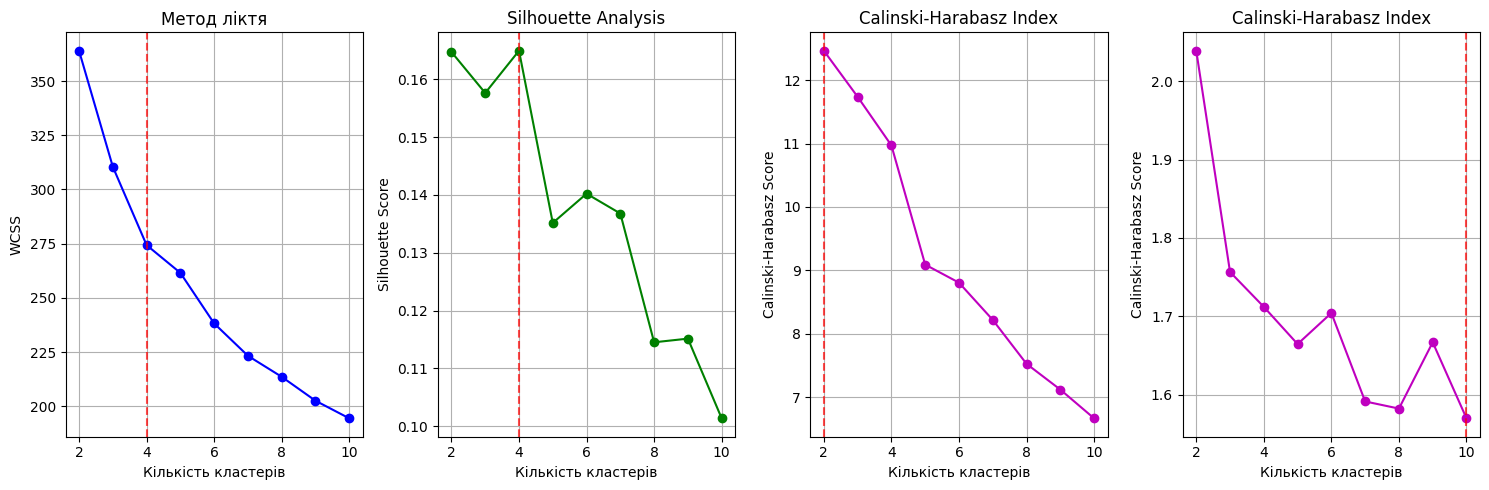


 РЕКОМЕНДАЦІЇ ЩОДО КІЛЬКОСТІ КЛАСТЕРІВ:
Метод ліктя: 4 кластерів
Silhouette: 4 кластерів
Calinski-Harabasz: 2 кластерів
Davies-Bouldin: 10 кластерів

ФІНАЛЬНА РЕКОМЕНДАЦІЯ: 5 кластерів


In [17]:
X = data.drop(columns = ["№"])
final_recommendation, recommendations = determine_optimal_clusters(X)

Кластеризація методом Уорда (Ward's Method)
Метод Уорда є одним з підходів до ієрархічної агломеративної кластеризації. На відміну від K-means, який розбиває дані на фіксовану кількість кластерів, ієрархічні методи будують деревовидну структуру кластерів (дендрограму), яка дозволяє досліджувати кластеризацію на різних рівнях деталізації.

Принцип роботи:

Початковий стан: Алгоритм починається з того, що кожна точка даних розглядається як окремий кластер.

Послідовне об'єднання: На кожному кроці алгоритм шукає два "найближчі" кластери та об'єднує їх в один. Цей процес повторюється, доки всі точки не будуть об'єднані в один великий кластер.

Критерій Уорда: Що робить метод Уорда унікальним, так це критерій, за яким визначається "близькість" кластерів. Він обирає для об'єднання ту пару кластерів, яка призводить до мінімального збільшення загальної внутрішньокластерної дисперсії (WCSS) або суми квадратів відстаней від кожної точки до центроїда її кластера. Іншими словами, метод Уорда намагається мінімізувати "втрату інформації" при об'єднанні кластерів, створюючи компактні та добре збалансовані кластери.

Переваги:
Не вимагає заздалегідь заданої кількості кластерів (k).
Надає повну ієрархію кластерів, що дозволяє гнучко вибирати рівень деталізації.
Схиляється до створення компактних, приблизно сферичних кластерів.

Недоліки:
Може бути обчислювально дорогим для великих наборів даних.
Чутливий до шуму та викидів.
Одного разу об'єднані кластери не можуть бути роз'єднані.

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

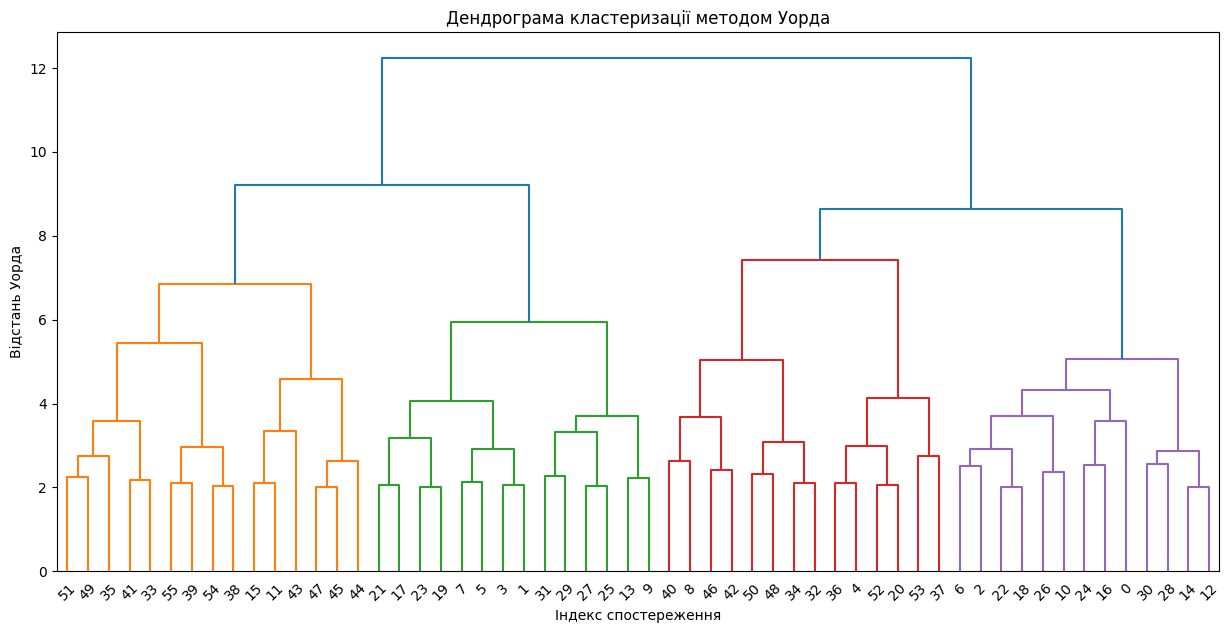

In [19]:
# Стандартизуємо дані 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Виконуємо кластеризацію методом Уорда
linked = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(15, 7))
# Створення дендрограми
dendrogram(
    linked,
    orientation='top', # Відображення зверху вниз
    labels=X.index.tolist(), # Використовувати індекси об'єктів як мітки
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_rotation=45.,       # Поворот міток на 45 градусів
    leaf_font_size=10.
)

plt.title('Дендрограма кластеризації методом Уорда')
plt.xlabel('Індекс спостереження')
plt.ylabel('Відстань Уорда')
plt.show()


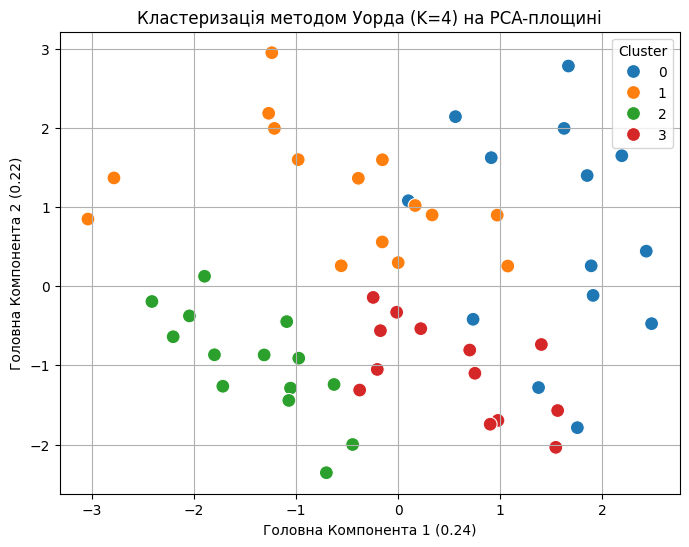

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns

# Визначте K на основі дендрограми
OPTIMAL_K = 4

# Застосування кластеризації для отримання міток
cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K, linkage='ward')
cluster_labels = cluster.fit_predict(X_scaled)

# Зниження розмірності до 2D за допомогою PCA для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Візуалізація кластерів на площині головних компонент
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", n_colors=OPTIMAL_K),
    legend='full',
    s=100
)
plt.title(f'Кластеризація методом Уорда (K={OPTIMAL_K}) на PCA-площині')
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True)
plt.show()

# Нечітка кластеризація (Fuzzy Clustering)

Традиційні методи кластеризації (як-от K-Means або ієрархічна кластеризація) відносяться до категорії **"жорсткої" кластеризації**, де кожна точка даних належить **виключно до одного** кластера. Однак, у багатьох реальних сценаріях дані не мають чітких меж, і точка може мати характеристики, що відповідають кільком групам.

Нечітка кластеризація вирішує цю проблему, дозволяючи точкам даних належати до **кількох кластерів одночасно**, але з різним **ступенем приналежності (membership degree)**. Кожен ступінь приналежності є числом від 0 до 1, а сума ступенів приналежності однієї точки до всіх кластерів дорівнює 1.

## Fuzzy C-Means (FCM)

Найпоширенішим алгоритмом нечіткої кластеризації є **Fuzzy C-Means (FCM)**. Його робота схожа на K-Means, але замість жорсткого призначення, він оптимізує ступені приналежності та положення центроїдів.

### Принцип роботи FCM:

1.  **Ініціалізація:** Визначається бажана кількість кластерів $c$ та параметр "розмитості" $m$ (зазвичай $m=2$), який контролює ступінь "м'якості" кластерних меж. Початкові ступені приналежності та/або центроїди ініціалізуються випадковим чином.
2.  **Ітеративний процес:** Алгоритм повторює два основні кроки, доки не досягне конвергенції (тобто зміни стають незначними):
    *   **Оновлення центроїдів:** Центроїд кожного кластера $i$ обчислюється як зважене середнє всіх точок даних, де вагою є ступінь приналежності точки до цього кластера (піднесений до степеня $m$). Точки з вищим ступенем приналежності більше впливають на положення центроїда.
        $$ c_i = \frac{\sum_{j=1}^{N} (u_{ij})^m \cdot x_j}{\sum_{j=1}^{N} (u_{ij})^m} $$
    *   **Оновлення ступенів приналежності:** Для кожної точки даних обчислюються її нові ступені приналежності до кожного кластера. Ступінь приналежності є обернено пропорційним до відстані від точки до центроїда кластера. Чим ближче точка до центроїда, тим вищий її ступінь приналежності до цього кластера.
        $$ u_{ij} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_j, c_i)}{d(x_j, c_k)}\right)^{\frac{2}{m-1}}} $$

### Візуалізація та інтерпретація:

Результати FCM можуть бути візуалізовані, показуючи не лише "основний" кластер, до якого належить точка, але й інтенсивність її приналежності до різних кластерів. Це дозволяє краще зрозуміти перехідні зони між кластерами.

### Переваги:

*   Дозволяє моделювати ситуації, де кластери перекриваються.
*   Надає більш детальну інформацію про взаємозв'язок точок з кластерами через ступені приналежності.
*   Корисна для аналізу даних з нечіткими або розмитими межами між групами.

### Недоліки:

*   Потребує попереднього задання кількості кластерів ($c$).
*   Чутлива до вибору початкових значень та параметра "розмитості" $m$.
*   Може бути обчислювально інтенсивнішою, ніж жорстка кластеризація.

In [21]:
import skfuzzy as fuzz

data_for_fcm = X_scaled.T
# data_for_fcm = X_scaled

# Вибір кількості кластерів 
n_clusters = 4
m = 1.5                    # Нечіткий показник (fuzziness exponent), зазвичай 2.0
max_iter = 5000            # Максимальна кількість ітерацій
error = 0.002              # Поріг зупинки

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_for_fcm, n_clusters, m, error=error, maxiter=max_iter, init=None
)

print(f"Коефіцієнт нечіткості поділу (FPC): {fpc:.4f}")
# Чим ближче FPC до 1, тим краще розділені кластери.

# Визначення "твердої" (crisp) належності:
# Призначаємо об'єкт до кластера, де його ступінь належності u_ik є максимальним
cluster_labels_fcm = u.argmax(axis=0)
# print(u)

Коефіцієнт нечіткості поділу (FPC): 0.4307


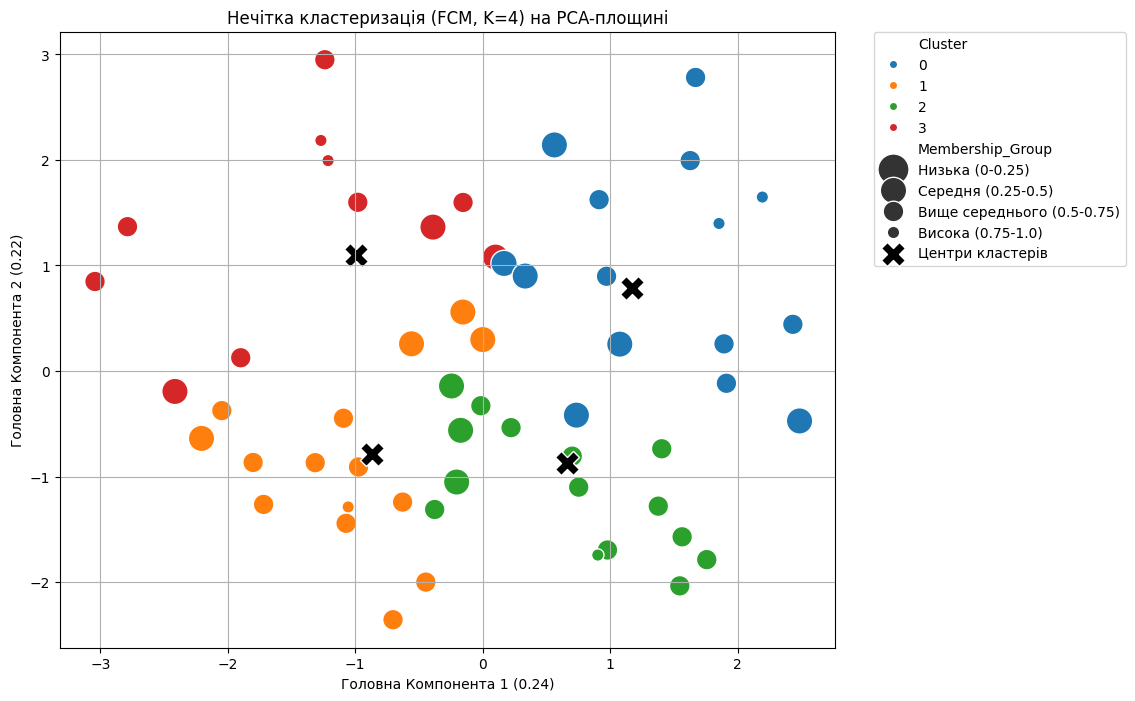

In [22]:
# Зниження розмірності (використовуємо той самий PCA, що і для Уорда)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels_fcm # Мітки "твердої" належності
pca_df['FCM_U_Max'] = u.max(axis=0)    # Максимальний ступінь належності

# Використовуємо вже навчений (fit) об'єкт PCA
centers_pca = pca.transform(cntr)
# Створюємо DataFrame для центрів
centers_df = pd.DataFrame(data=centers_pca, columns=['PC1', 'PC2'])
# Для зручності додамо мітки кластерів
centers_df['Cluster'] = centers_df.index
# Переконаємось, що тип даних відповідає типу 'Cluster' в pca_df (це важливо для коректного відображення кольорів)
centers_df['Cluster'] = centers_df['Cluster'].astype(pca_df['Cluster'].dtype)

plt.figure(figsize=(10, 8))

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Низька (0-0.25)', 'Середня (0.25-0.5)', 'Вище середнього (0.5-0.75)', 'Висока (0.75-1.0)']

# Використовуємо pd.cut для категоризації неперервних значень
pca_df['Membership_Group'] = pd.cut(
    pca_df['FCM_U_Max'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)
# Визначаємо фактичну кількість унікальних кластерів для палітри
N_CLUSTERS = pca_df['Cluster'].nunique()



# Візуалізація: кольори - кластери, розмір точки - ступінь належності
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    size='Membership_Group', # <<< ВИКОРИСТОВУЄМО КАТЕГОРІАЛЬНУ ЗМІННУ ДЛЯ РОЗМІРУ
    data=pca_df, 
    # Встановлюємо палітру, яка точно відповідає N_CLUSTERS
    palette=sns.color_palette("tab10", n_colors=N_CLUSTERS), 
    legend='full',
    sizes=(80, 500) # Розширюємо діапазон розмірів для більшої наочності
)

plt.scatter(
    centers_df['PC1'],
    centers_df['PC2'],
    marker='X', # Використовуємо маркер 'X'
    s=300,       # Збільшений розмір
    color='black', # Колір центрів (наприклад, чорний)
    edgecolors='white', # Біла обведення для контрасту
    label='Центри кластерів' # Додаємо до легенди
)

plt.title(f'Нечітка кластеризація (FCM, K={n_clusters}) на PCA-площині')
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

# 2.7 Алгоритм кластеризації, що використовує теорію графів (λ-KRAB)

Порівняно новим напрямком у розробці методів кластеризації є підходи, що базуються на теорії графів. Розвинений математичний апарат є альтернативою численним евристичним методам. Значного поширення набули методи, які базуються на пірамідальних мережах, що ростуть. Такі мережі дозволяють виконувати кластеризацію в режимі реального часу.

У багатьох задачах важливу роль відіграють не самі відстані між об'єктами, а відношення між ними. Алгоритми, які розглядаються нижче, мають у своїй основі особливість людського сприйняття кластерів – увагу звертають не на абсолютні відстані, а на відношення відстаней між декількома сусідніми точками.

### Визначення λ-відстані

Зробимо попередні припущення. Уявімо, що усі точки генеральної сукупності з'єднані між собою ребрами повного графа.
Позначимо довжину ребра між точками A та B як $d(A, B)$. Серед усіх ребер, які є суміжними ребру $(A, B)$, знайдемо найкоротше, і його довжину позначимо $\beta_{min}(A, B)$.

**λ-довжиною ребра (A, B)** називають відношення $\lambda(A, B)$:
$$ \lambda(A, B) = \frac{d(A, B)}{\beta_{min}(A, B)} $$

Очевидно, що більші значення $\lambda$ мають ребра, які з'єднують якомога більш віддалені одна від іншої точки, оточені близькими сусідами. Саме такі локальні сплески щільності точок найкраще помічає людське око при емпіричній кластеризації.

### Алгоритм λ-KRAB

Алгоритм λ-KRAB складається з наступних кроків:

**Крок 1.** Знайти пару точок із мінімальним значенням $\lambda$-відстані між ними і з'єднати їх ребром нового графа.
**Крок 2.** З'єднати наступні найбільш $\lambda$-близькі точки тих, що ще не приєднані до побудованого графа.
**Крок 3.** Якщо всі точки вичерпані, то перехід на крок 4, якщо ні - то на крок 2.

**Зауваження 1.** Отриманий граф не має петель і сумарна довжина всіх його ребер буде мінімальною. Граф із такими властивостями називають **найкоротшим незамкненим шляхом (ННШ)** і позначають $\lambda$-ННШ.

---

**Крок 4.** Для кожного ребра знайдемо характеристику його **напруженості** $C_i$:
$$ C_i = \lambda_i \left( \frac{2m_l}{m} \right) \left( \frac{2m_r}{m} \right) $$
де $m_l$ та $m_r$ - кількість точок, що знаходяться від даного ребра ліворуч та праворуч відповідно. $m$ - загальна кількість точок.
Найбільш напружене ребро в графі вилучають.

**Крок 5.** Позначимо довжину розірваного ребра $d$. Розрахуємо середнє значення довжини внутрішніх ребер таксонів $v$. Якщо кластер містить один об'єкт, то $v=0$. Якщо два об'єкти - $v=1$. При об'єднанні всіх точок в один кластер - $d=0$.

**Зауваження 2.** Розрив найбільш напруженого ребра забезпечує виконання одночасно цілої низки умов:
– границя між кластерами проходить по найбільш напружених ребрах $\lambda$-ННШ;
– середня напруженість внутрішніх ребер у кластерах буде мінімальною;
– кластери матимуть однакове число точок.

### Критерій якості кластеризації

**Зауваження 3.** Критерієм якості кластеризації вважають величину $F$:
$$ F = \frac{C_d}{C_r + V} $$
де $C_d$ - середня напруженість граничних ребер; $C_r$ - середня напруженість внутрішніх ребер кластерів; коефіцієнт $V \ge 0$ для того, аби при збільшенні числа одиничних кластерів значення $F$ не прямувало до нескінченності.

Раціонально прирівняти $V$, наприклад, середньому значенню напруженості ($C_c$) повного $\lambda$-ННШ. Тоді:
$$ F = \frac{C_d}{C_r + C_c} $$

Якщо всі точки об'єднані в один кластер, то $F=0$. Таким чином, значення $F$ може бути як меншим, так і більшим за 1, але завжди є більшим за 0. Характеристика $F$ інваріантна по відношенню до абсолютних значень довжин ребер графа $\lambda$-ННШ, що дозволяє порівнювати між собою якість кластеризації різних множин при різній кількості об'єктів $m$, різному числі кластерів $k$, різній середній $\lambda$-відстані між об'єктами.

Якщо бажане число кластерів задано діапазоном від $k_{min}$ до $k_{max}$, то, спостерігаючи за значеннями функції $F = f(k)$, легко знайти таке число кластерів, при якому $F$ сягає максимуму, що відповідає оптимальній кластеризації.

### Важливі аспекти реалізації

Важливим етапом реалізації алгоритму KRAB є побудова $\lambda$-ННШ. Якщо кількість початкових точок перевищує кілька сотень, то етап побудови є дуже трудомістким. Для прискорення виконання процедури обов'язково необхідно виконувати попередню підготовку даних.

Типова стратегія попередньої підготовки може включати:
- **Використання k-d дерев або балів-дерев** для ефективного пошуку найближчих сусідів.
- **Паралельні обчислення** для прискорення побудови графа.
- **Прорідження графа** на ранніх етапах, щоб уникнути роботи з повним графом для великих наборів даних.

In [55]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import deque

def bfs_count(matrix, start, skip_edge=None):
    n = len(matrix)
    visited = [False] * n
    queue = deque([start])
    visited[start] = True
    count = 1

    while queue:
        node = queue.popleft()
        for neighbor in range(n):
            if matrix[node][neighbor] != 0:
                if skip_edge and ((node, neighbor) == skip_edge or (neighbor, node) == skip_edge):
                    continue
                if not visited[neighbor]:
                    visited[neighbor] = True
                    queue.append(neighbor)
                    count += 1
    return count

def bfs_count_in_cluster(graph: np.ndarray, 
                         start_node: int, 
                         cluster_nodes: list, 
                         skip_edge: tuple) -> int:
    n = graph.shape[0]
    # Множина всіх вершин у кластері для швидкої перевірки належності
    cluster_set = set(cluster_nodes) 
    
    # Перевірка, чи стартова вершина взагалі належить кластеру
    if start_node not in cluster_set:
        return 0

    # Визначаємо кінці ребра, яке потрібно ігнорувати, для спрощення перевірки
    skip_u, skip_v = skip_edge
    
    visited = {start_node}
    queue = deque([start_node])
    count = 0

    while queue:
        u = queue.popleft()
        count += 1
        
        # Обхід сусідів
        for v in range(n):
            # 1. Перевіряємо наявність ребра у графу
            if graph[u, v] != 0:
                # 2. Перевіряємо, чи належить сусідня вершина v поточному кластеру
                if v in cluster_set:
                    # 3. Перевіряємо, чи це не те ребро, яке ми уявно видаляємо (skip_edge)
                    is_skip_edge = (u == skip_u and v == skip_v) or (u == skip_v and v == skip_u)
                    
                    if not is_skip_edge and v not in visited:
                        visited.add(v)
                        queue.append(v)

    return count


def lambda_krab(data, k_min=2, k_max=5):
    # --- Крок 0. Підготовка даних ---
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    n = data_scaled.shape[0]

    # --- Крок 1. Матриця відстаней ---
    D = squareform(pdist(data_scaled, metric='euclidean'))

    # --- Крок 2. Матриця λ ---
    Lambda = np.zeros_like(D)
    for i in range(n):
        for j in range(n):
            if i == j:
                Lambda[i][j] = np.inf
                continue
            alfa = D[i][j]
            beta_i = np.min(D[i, np.arange(n) != i])
            beta_j = np.min(D[j, np.arange(n) != j])
            beta = min(beta_i, beta_j)
            Lambda[i][j] = alfa / beta

       

    # крок 1-3 алгоритму : знаходження мінімальних лямб, створення нового графа
    GLambda = np.zeros_like(D)
    connected = set()
    np_matrix = np.array(Lambda)
    # disconnected = [1]*n
    
    while len(connected) < n:
        if len(connected) < 2:
            min_value = np_matrix.min()   
            min_indices = np.where(np_matrix == min_value)
            row_index, col_index = min_indices[0][0],min_indices[1][0]
       
        else:
            min_value = np.inf
            row_index, col_index = -1,-1
            for i in range(n):
                for j in range(n):
                    if i in connected or j in connected:
                        new_min = np_matrix[i][j]
                        if new_min < min_value:
                            min_value = new_min
                            row_index, col_index = i, j
        
        if min_value == np.inf:
            break
        
        if row_index in connected and col_index in connected:
            np_matrix[row_index][col_index] = np.inf
            np_matrix[col_index][row_index] = np.inf
            continue
            
        connected.add(row_index)
        connected.add(col_index)
        
        GLambda[row_index][col_index] = min_value
        GLambda[col_index][row_index] = min_value
        
        np_matrix[row_index][col_index] = np.inf
        np_matrix[col_index][row_index] = np.inf

    # --- Функція для розбиття графа на компоненти ---
    def get_clusters(graph):
        n = len(graph)
        visited = [False] * n
        clusters = []
        for i in range(n):
            if not visited[i]:
                q = deque([i])
                visited[i] = True
                cluster = []
                while q:
                    node = q.popleft()
                    cluster.append(node)
                    for neighbor in range(n):
                        if graph[node][neighbor] != 0 and not visited[neighbor]:
                            visited[neighbor] = True
                            q.append(neighbor)
                clusters.append(cluster)
        return clusters

    # --- Крок 4–5. Вилучення ребер і обчислення F(k) ---
    results = {}
    current_graph = GLambda.copy()
    rozirvani_rebra = []
    all_clusters = []
    
    for k in range(1, k_max + 1):
        # Крок 4: знаходження Ci
        C = {}
        for i in range(n):
            for j in range(i + 1, n):
                if current_graph[i][j] != 0:
                    lambda_ij = current_graph[i][j]
                    ml = bfs_count(current_graph, i, skip_edge=(i, j))
                    mr = bfs_count(current_graph, j, skip_edge=(i, j))
                    m = mr + ml
                    Ci = lambda_ij * (2 * ml / m) * (2 * mr / m)
                    C[(i, j)] = Ci
                   

        if not C:
            break

        # Найбільш напружене ребро
        max_edge = max(C, key=C.get)
        max_val = C[max_edge]
        rozirvani_rebra.append(max_val)

        # Видаляємо його
        current_graph[max_edge[0]][max_edge[1]] = 0
        current_graph[max_edge[1]][max_edge[0]] = 0

        # Кластеризація після видалення
        clusters = get_clusters(current_graph)
        all_clusters.append(clusters)

        internal_rhos = []
        for cluster_nodes in clusters:
            # current_graph тепер містить k-кластерів (k = len(clusters))
            # Створюємо тимчасовий підграф тільки для цього кластера (або працюємо з його вершинами)
            
            # Ітеруємо по ребрах, які залишилися в цьому кластері
            for i in cluster_nodes:
                for j in cluster_nodes:
                    if i < j and current_graph[i][j] != 0:
                        # Це внутрішнє ребро (i, j)
                        lambda_ij = current_graph[i][j]
                        
                        # Функція повинна рахувати компоненти ТІЛЬКИ в межах cluster_nodes
                        ml = bfs_count_in_cluster(current_graph, i, cluster_nodes, skip_edge=(i, j))
                        mr = bfs_count_in_cluster(current_graph, j, cluster_nodes, skip_edge=(i, j))
                        
                        m = ml + mr # m = розмір кластера
                        
                        # Ci - це напруженість внутрішнього ребра
                        Ci_internal = lambda_ij * (2 * ml / m) * (2 * mr / m)
                        internal_rhos.append(Ci_internal)
                
        cd = np.mean(rozirvani_rebra)
        cr = np.mean(internal_rhos) if internal_rhos else 0
        cc = np.mean(list(C.values()))
        F = cd / (cr + cc) if (cr + cc) != 0 else 0
        
        results[len(clusters)] = F

        if (k == k_max-1 and k_min == k_max):
            return clusters


    # --- Оптимальне число кластерів ---
    k_opt = max(results, key=results.get)
    print(f"Оптимальне число кластерів: {k_opt}, F = {results[k_opt]:.4f}")

    return {
        "k_opt": k_opt,
        "F_values": results,
        "clusters": all_clusters[k_opt]}


In [56]:
result = lambda_krab(data, k_min=2, k_max=10)
print("Оптимальне k:", result["k_opt"])
print("F значення:", result["F_values"])

Оптимальне число кластерів: 2, F = 1.5319
Оптимальне k: 2
F значення: {2: np.float64(1.531909704364421), 3: np.float64(1.191010400330618), 4: np.float64(1.084946193380654), 5: np.float64(1.067137343884707), 6: np.float64(0.9814815608746043), 7: np.float64(0.8951583986235795), 8: np.float64(0.8338854911489971), 9: np.float64(0.7988817761641624), 10: np.float64(0.7935323868512228), 11: np.float64(0.7946706405144583)}


Кількість унікальних міток (кластерів): 10
Розподіл точок по кластерах: {np.int64(0): np.int64(10), np.int64(1): np.int64(2), np.int64(2): np.int64(7), np.int64(3): np.int64(2), np.int64(4): np.int64(2), np.int64(5): np.int64(9), np.int64(6): np.int64(14), np.int64(7): np.int64(6), np.int64(8): np.int64(2), np.int64(9): np.int64(2)}


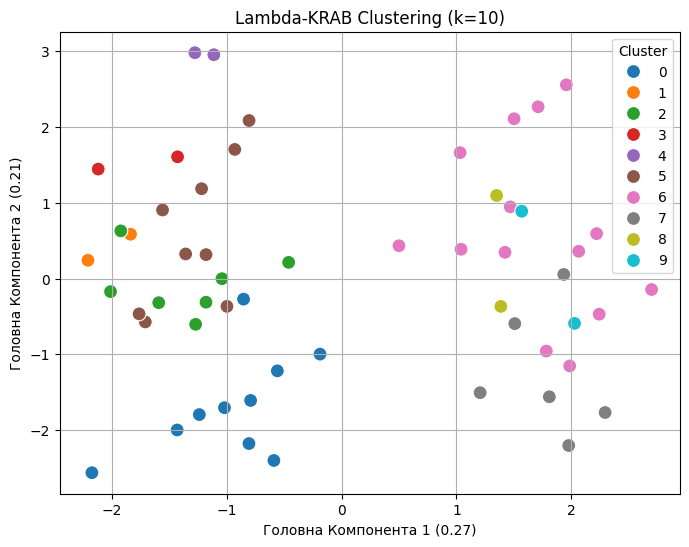

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_clusters = 10
new_results = lambda_krab(data, k_min = num_clusters, k_max = num_clusters)

labels = np.zeros(len(data), dtype=int)
for idx, cluster in enumerate(new_results):
    for node in cluster:
        labels[node] = idx
        
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"Кількість унікальних міток (кластерів): {len(unique_labels)}")
print(f"Розподіл точок по кластерах: {dict(zip(unique_labels, counts))}")

data_scaled = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Візуалізація кластерів на площині головних компонент
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", n_colors=num_clusters),
    legend='full',
    s=100
)
plt.title(f"Lambda-KRAB Clustering (k={num_clusters})")
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True)
plt.show()

In [26]:
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
N, D = data_scaled.shape# N - кількість об'єктів, D - розмірність (n)

# 2. ІНІЦІАЛІЗАЦІЯ SOM (Крок 1 та 2 алгоритму)
# Розмір має на порядок перевищувати кількість очікуваних кластерів.
# Наприклад, для 4 кластерів можна взяти ґратку 5x5 = 25 нейронів.
# (x, y) - розмір сітки; D - розмірність вхідних векторів.
map_size_x = 10
map_size_y = 10

som = MiniSom(map_size_x, map_size_y, D, 
              sigma=1.0,           # Початковий радіус навчання (sigma)
              learning_rate=0.5,   # Початкова швидкість навчання (alpha)
              neighborhood_function='gaussian', # Функція сусідства (Таблиця 2.2)
              random_seed=42)
# Ініціалізація ваг (Крок 2.1)
# 'random' (випадкові) або 'pca' (за PCA, що прискорює навчання)
som.random_weights_init(data_scaled)

# 3. НАВЧАННЯ (Крок 3 алгоритму)
num_iterations = 3000 # Кількість епох (t)

# Навчання з ітераціями
# Це циклічно повторює Крок 3.1 - 3.3
som.train_random(data_scaled, num_iterations)

# Знаходження нейрона-переможця (BMU - Best Matching Unit) для кожного вхідного вектора
# Це відповідає Кроку 3.2
bmu_coordinates = np.array([som.winner(x) for x in data_scaled])

# Присвоєння міток кластерів:
# Якщо ми хочемо отримати K кластерів, ми можемо застосувати K-Means 
# до векторів ваг навчених нейронів.
from sklearn.cluster import KMeans

# Припустимо, ми хочемо 4 кластери
n_clusters = 4 

# Кластеризуємо ВАГИ нейронів (centers)
weights = som.get_weights().reshape(-1, D)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(weights)

# Мітки кластерів для кожного нейрона
neuron_cluster_labels = kmeans.labels_

# Мітки кластерів для кожного вхідного вектора
# Кожен вектор отримує мітку того кластера, до якого належить його BMU-нейрон
cluster_labels = np.array([neuron_cluster_labels[bmu[0] * map_size_y + bmu[1]] 
                           for bmu in bmu_coordinates])

print(f"Кластеризація завершена. Кількість кластерів: {n_clusters}")

Кластеризація завершена. Кількість кластерів: 4


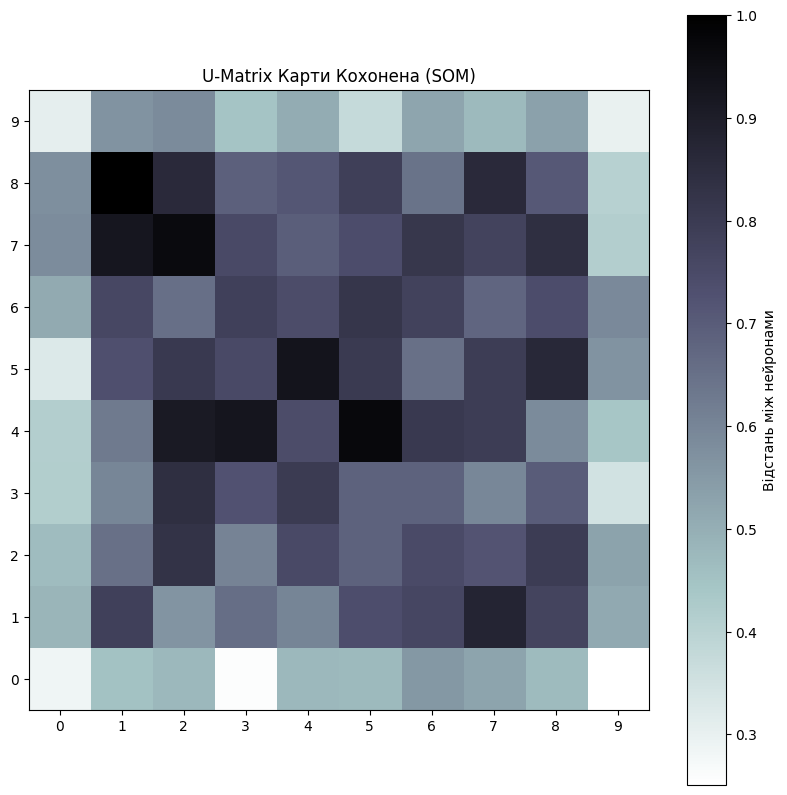

C:\Users\NewRT\AppData\Local\Temp\ipykernel_8116\2541692482.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  markerfacecolor=plt.cm.get_cmap('tab10')(norm(cluster_labels[i])),


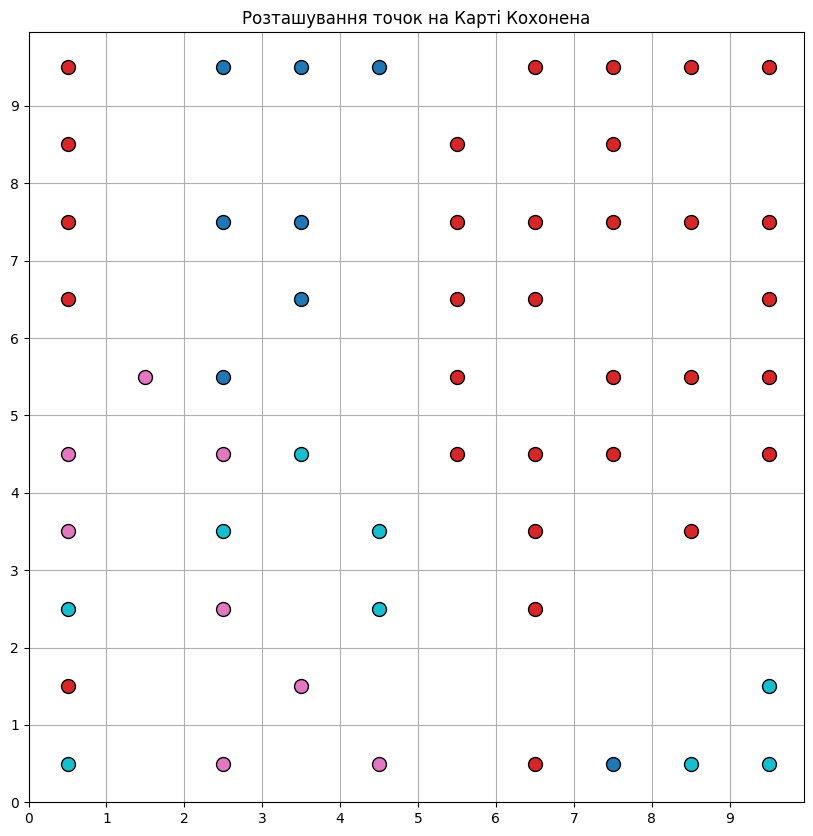

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Отримання U-Matrix
U = som.distance_map()

plt.figure(figsize=(map_size_x, map_size_y))
# Відображення U-Matrix
plt.imshow(U.T, cmap='bone_r', origin='lower') # 'bone_r' - для кращого контрасту
plt.colorbar(label='Відстань між нейронами')
plt.title('U-Matrix Карти Кохонена (SOM)')
plt.xticks(np.arange(map_size_x))
plt.yticks(np.arange(map_size_y))
plt.grid(False)
plt.show()

# Візуалізація кластерів на карті
# Це відображає мітки cluster_labels на сітці
plt.figure(figsize=(map_size_x, map_size_y))
norm = Normalize(vmin=0, vmax=n_clusters - 1)
for i, x in enumerate(data_scaled):
    w = som.winner(x) # Нейрон-переможець
    # Розміщуємо точку на координатній сітці BMU
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
             marker='o', 
             markerfacecolor=plt.cm.get_cmap('tab10')(norm(cluster_labels[i])), 
             markeredgecolor='k', 
             markersize=10)
plt.title('Розташування точок на Карті Кохонена')
plt.xticks(np.arange(map_size_x))
plt.yticks(np.arange(map_size_y))
plt.grid(True)
plt.show()

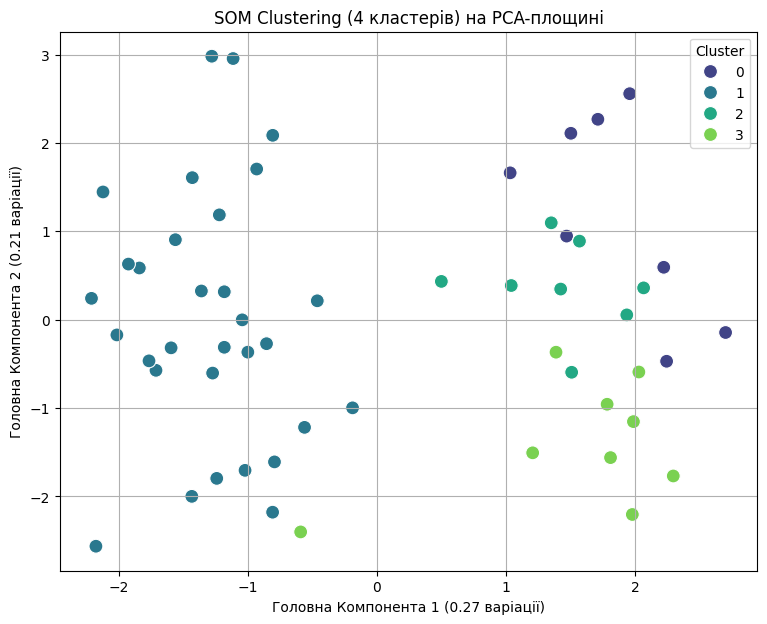

In [31]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- КРОК 1: ПІДГОТОВКА ДАНИХ (для PCA) ---
data_scaled = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# num_som_clusters = 4 # Використовуйте фактичну кількість кластерів SOM

som_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
som_pca_df['Cluster'] = cluster_labels # Змінна з мітками, отриманими від SOM

# --- КРОК 3: ВІЗУАЛІЗАЦІЯ SOM НА PCA-ПЛОЩИНІ ---
plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=som_pca_df, 
    # Використовуємо іншу палітру для кращої диференціації
    palette=sns.color_palette("viridis", n_colors=n_clusters), 
    legend='full',
    s=100
)

plt.title(f"SOM Clustering ({n_clusters} кластерів) на PCA-площині")
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f} варіації)')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f} варіації)')
plt.grid(True)
plt.show()

In [36]:
from sklearn.mixture import GaussianMixture
import numpy as np

K = 4 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ініціалізація GMM (ЕМ-алгоритм)
# Параметри:
# n_components=K: бажана кількість кластерів (Крок 1)
# covariance_type: тип коваріаційної матриці (R)
gmm = GaussianMixture(n_components=K, 
                      covariance_type='diag', # 'diag' відповідає діагональній матриці R
                      max_iter=100,           # Максимальна кількість ітерацій (Т)
                      tol=1e-3,               # Допустиме відхилення для логарифмічної правдоподібності (ε)
                      random_state=42)        # Фіксація ініціалізації

# Навчання моделі (виконання Е та М процедур)
gmm.fit(data_scaled)

# Математичні очікування μ
# Розмір: K x q (кількість кластерів x розмірність)
mu = gmm.means_ 
print(f"Математичні очікування (mu):\n{mu}")

# W (Ваги wi)
# Розмір: K x 1
weights = gmm.weights_
print(f"Ваги кластерів (wi):\n{weights}") 

# R (Коваріації Σ)
# Для 'diag' (діагональної матриці R) це вектор дисперсій для кожного кластера
sigma_diag = gmm.covariances_ 
print(f"Діагональні елементи коваріаційної матриці (Sigma):\n{sigma_diag}")

# Ймовірності належності об'єкта кожному кластеру (розмір: n x K)
probabilities = gmm.predict_proba(data_scaled)
# Мітки кластерів (розмір: n)
labels = gmm.predict(data_scaled)
print(f"Мітки кластерів для кожного об'єкта:\n{labels}")

Математичні очікування (mu):
[[-7.73360281e-01 -1.00000000e+00  0.00000000e+00 -4.37150316e-16
   1.44337567e-01  1.44337567e-01 -8.66025404e-01 -7.95819853e-01
   2.05490888e-01]
 [ 9.89901160e-01  0.00000000e+00  0.00000000e+00 -4.30211422e-16
   1.15470054e+00 -8.66025404e-01  1.15470054e+00  1.14505529e+00
   6.19479846e-01]
 [-7.11491459e-01  1.00000000e+00  0.00000000e+00 -4.37150316e-16
   1.44337567e-01  1.44337567e-01 -8.66025404e-01  1.28513501e-01
  -1.14874418e+00]
 [ 9.89901160e-01  0.00000000e+00  0.00000000e+00 -4.37150316e-16
  -8.66025404e-01  1.44337567e-01  1.15470054e+00  9.47787068e-02
   6.33513371e-01]]
Ваги кластерів (wi):
[0.28571429 0.14285714 0.28571429 0.28571429]
Діагональні елементи коваріаційної матриці (Sigma):
[[3.25359852e-01 1.00000000e-06 1.00000100e+00 1.00000100e+00
  1.02083433e+00 1.02083433e+00 1.00000000e-06 6.35677742e-01
  3.16630958e-01]
 [2.00966938e-02 1.00000100e+00 1.00000100e+00 1.00000100e+00
  1.00000000e-06 1.00000000e-06 1.00000000e

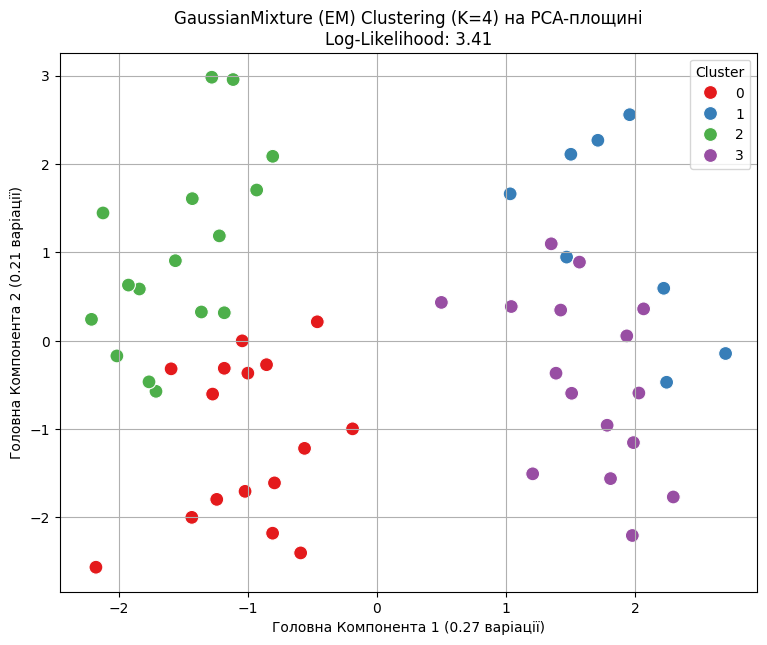

In [37]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# --- КРОК 4: СТВОРЕННЯ DATAFRAME ТА ВІЗУАЛІЗАЦІЯ ---
gmm_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
# Мітки GMM використовуються для кодування кольору
gmm_pca_df['Cluster'] = labels 

# Обчислення логарифмічної правдоподібності (для відображення на графіку)
log_likelihood = gmm.score(data_scaled)

plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=gmm_pca_df, 
    # Використовуємо палітру, що підходить для K кластерів
    palette=sns.color_palette("Set1", n_colors=K), 
    legend='full',
    s=100
)

# Форматування підписів
plt.title(f"GaussianMixture (EM) Clustering (K={K}) на PCA-площині\nLog-Likelihood: {log_likelihood:.2f}")
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f} варіації)')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f} варіації)')
plt.grid(True)
plt.show()